In [101]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

warnings.filterwarnings("ignore")

# Data Preprocessing

In [17]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scaling X_train and X_test in a range of 0 to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshaping X_train and X_test
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Converting y_train and y_test into categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# Visualizing X_train Images

In [31]:
random_images = np.random.choice(range(len(X_train)), 9)

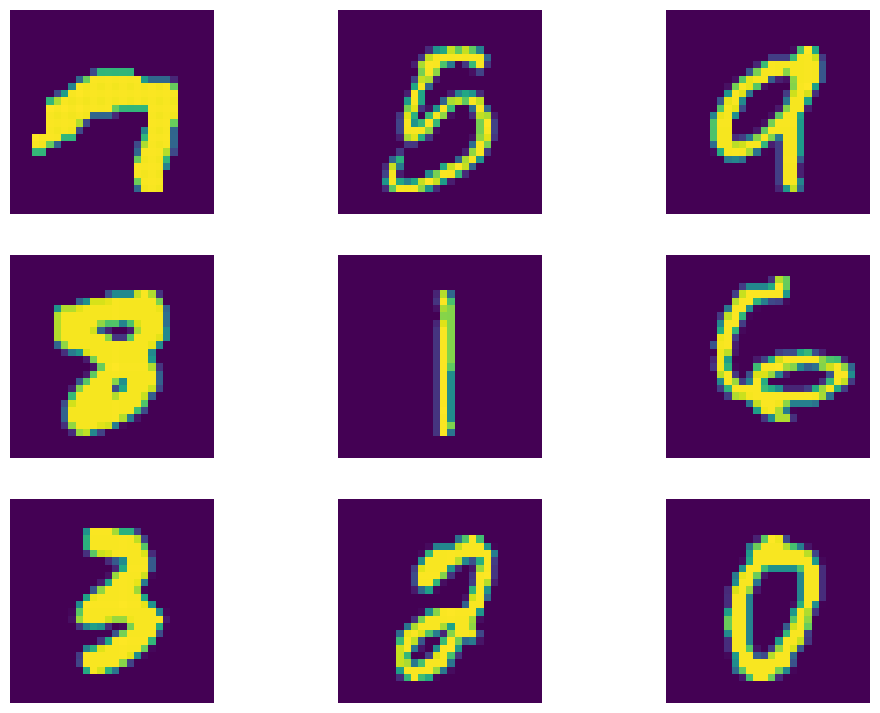

In [42]:
plt.figure(figsize = (12, 9))
for i, img_index in enumerate(random_images):
    plt.subplot(3, 3, i + 1) # (row, column, index)
    plt.imshow(X_train[img_index])
    plt.axis("off")

# Building CNN Model

In [52]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = "relu"),
    Flatten(),
    Dense(512, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [54]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [56]:
history_performance = model.fit(X_train, y_train, batch_size = 30, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0568 - val_accuracy: 0.9835
Epoch 2/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 3/10
2000/2000 [==============================] - 49s 24ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0381 - val_accuracy: 0.9896
Epoch 4/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0457 - val_accuracy: 0.9887
Epoch 5/10
2000/2000 [==============================] - 49s 24ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 6/10
2000/2000 [==============================] - 49s 24ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0465 - val_accuracy: 0.9884
Epoch 7/10
2000/2000 [==============================] - 49s 25ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0442 -

# Evaluating Performace

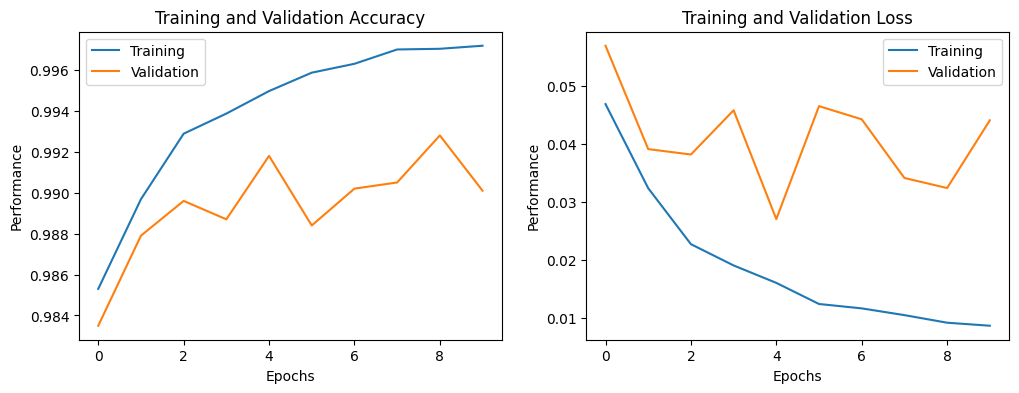

In [79]:
epoch_steps = range(len(history_performance.history["accuracy"]))

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1) # (row, col, index)
plt.title("Training and Validation Accuracy")
plt.plot(epoch_steps, history_performance.history["accuracy"] , label = "Training")
plt.plot(epoch_steps, history_performance.history["val_accuracy"], label = "Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Performance")

plt.subplot(1, 2, 2)
plt.title("Training and Validation Loss")
plt.plot(epoch_steps, history_performance.history["loss"], label = "Training")
plt.plot(epoch_steps, history_performance.history["val_loss"], label = "Validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Performance")

plt.show()

In [80]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [84]:
predicted_classes = np.argmax(y_pred, axis = 1)
actual_classes = np.argmax(y_test, axis = 1)

In [88]:
accuracy = confusion_matrix(actual_classes, predicted_classes)

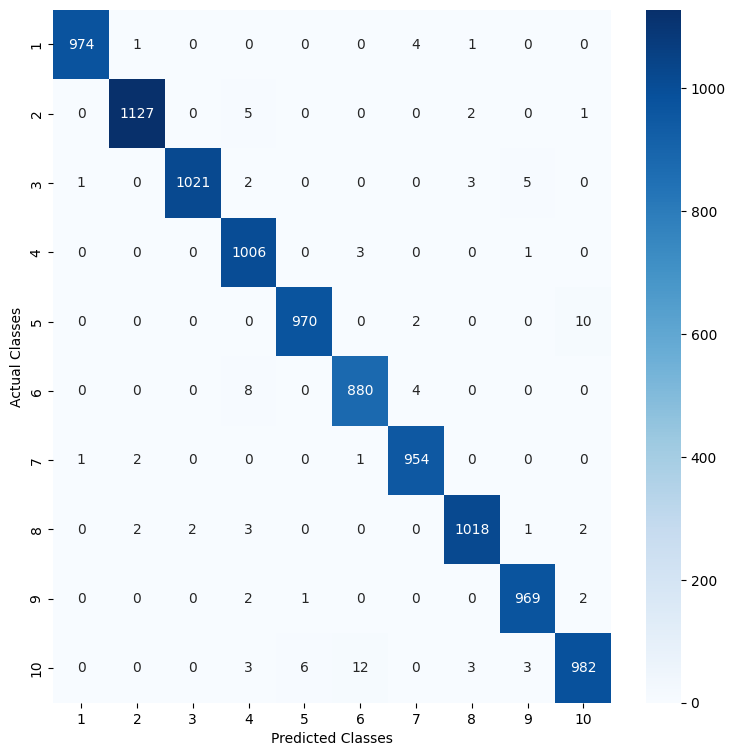

In [97]:
plt.figure(figsize = (9, 9))
sns.heatmap(accuracy, annot = True, fmt = "d", cmap = "Blues", xticklabels = range(1, 11), yticklabels = range(1, 11))
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# Predicting New Image

In [110]:
img_seven = load_img("./seven.png", color_mode = "grayscale")
arr_seven = img_to_array(img_seven)
arr_seven = np.expand_dims(arr_seven, axis = 0)

In [113]:
seven_pred = model.predict(arr_seven)

1/1 [==============================] - 0s 40ms/step


In [114]:
np.argmax(seven_pred)

7